In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics

dataset=pd.read_csv('diabetes.csv')
print(dataset.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
#data visualization
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

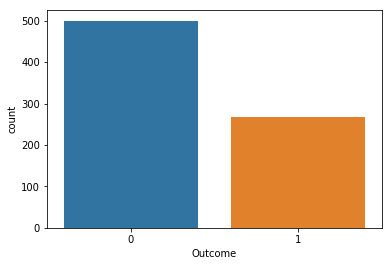

In [17]:
sns.countplot(dataset['Outcome'],label='count')
plt.show()

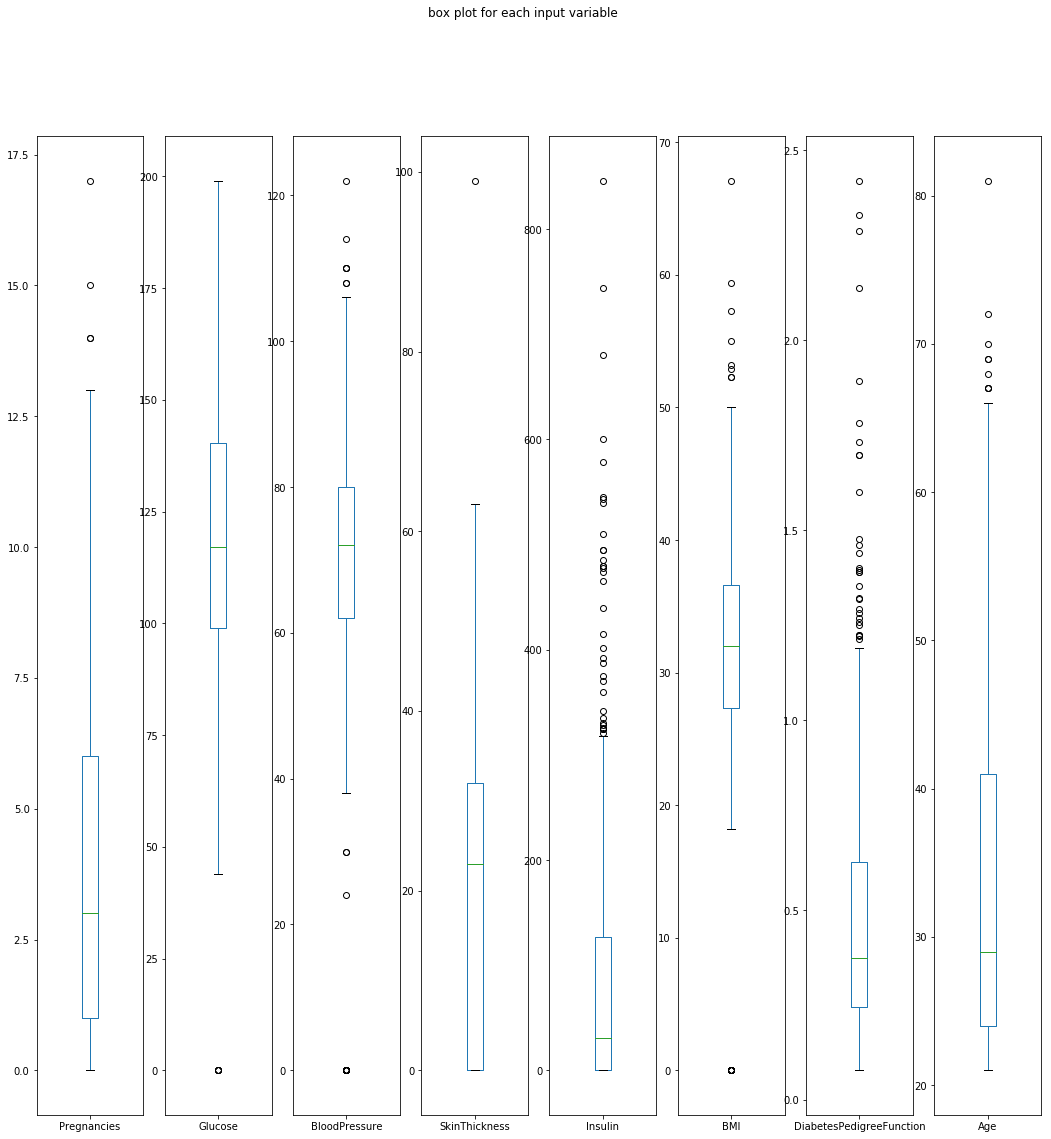

In [18]:
#distribution of predictor variable
dataset.drop('Outcome', axis=1).plot(kind='box' , subplots=True  , layout=(1,8) , sharex=False , sharey=False  , figsize=(18,18) , title='box plot for each input variable')
#plt.savefig('box_plot_for_diabetes_(pi)')
plt.show()

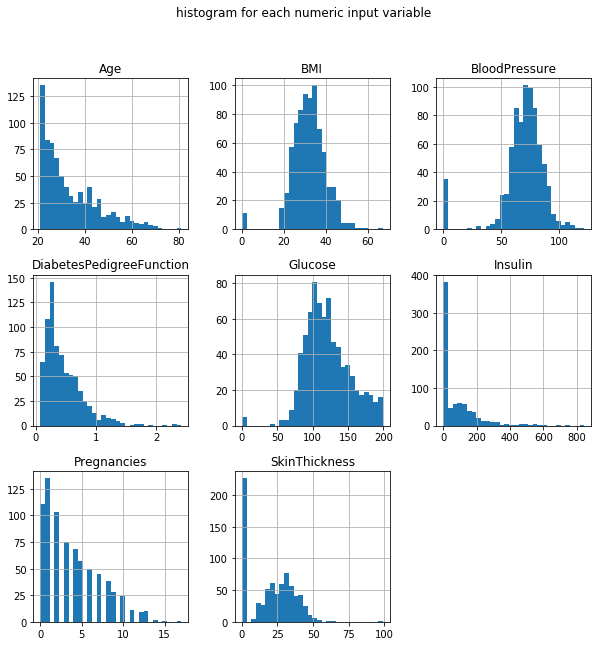

In [19]:
#plotting a histogram to depict co-relation between diff attributes
import pylab as pl

dataset.drop('Outcome' , axis=1).hist(bins=30,figsize=(10,10))
pl.suptitle('histogram for each numeric input variable')
plt.savefig('co_relation_figure')
plt.show()

In [193]:
#splitting dataset
x=dataset.loc[:,dataset.columns!='Outcome']
y=dataset['Outcome']

x_train, x_test , y_train, y_test = tts(x,
                                        y,
                                        random_state=66,
                                        )

In [194]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [195]:
#KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

#score: accuracy of knn classifier on test set
score=knn.score(x_test, y_test)
print('Accuracy of K-NN classifier on training set: {:.4f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'.format(score))

Accuracy of K-NN classifier on training set: 0.8281
Accuracy of K-NN classifier on test set: 0.7240


Accuracy of K-NN classifier on training set: 0.7917
Accuracy of K-NN classifier on test set: 0.7708 


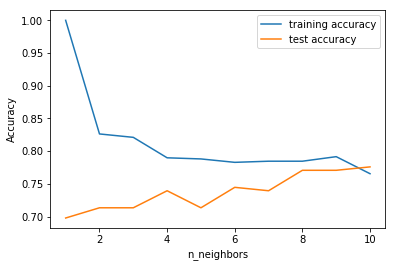

In [196]:
#going in detail for better accuracy

xtrain,xtest,ytrain,ytest = tts(x,
                                y,
                                stratify=dataset['Outcome'] ,
                                random_state=100
                               )

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(knn.score(xtrain, ytrain))
    # record test set accuracy
    test_accuracy.append(knn.score(xtest, ytest))
    
plt.figure()
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
#plt.savefig('knn_neighbours')

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrain, ytrain)

score=knn.score(xtest, ytest)
print('Accuracy of K-NN classifier on training set: {:.4f}'.format(knn.score(xtrain, ytrain)))
print('Accuracy of K-NN classifier on test set: {:.4f} '.format(score))

In [197]:
# confusion matrix
predicted=knn.predict(xtest)

cm = metrics.confusion_matrix(ytest, predicted)
print(' [ 0 ][ 1 ]  <- predicted o/p \n',cm) 

 [ 0 ][ 1 ]  <- predicted o/p 
 [[109  16]
 [ 28  39]]


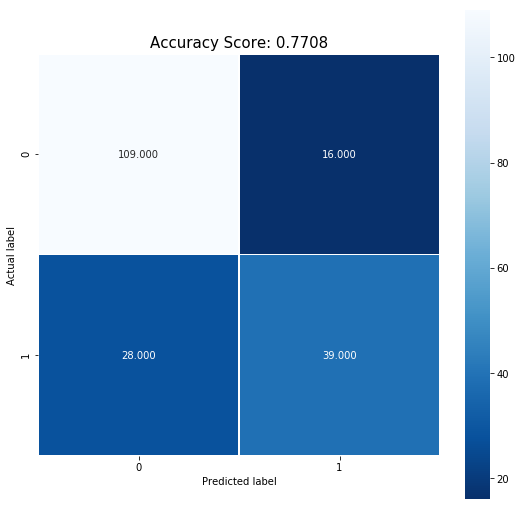

In [198]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(score)
plt.title(all_sample_title, size = 15);
#plt.savefig('confusion matrix - RANDOM FOREST')

In [199]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

#instancing logicregression class
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train , y_train)

#score: accuracy of logistic regression on test set
score=logreg.score(x_test, y_test)
print('accuracy of training set: {:.4f}'.format(logreg.score(x_train, y_train)))
print('accuracy of test set: {:.4f}'.format(score))

accuracy of training set: 0.7622
accuracy of test set: 0.8021


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [200]:
#confusion matrix
predicted=logreg.predict(x_test)
cm = metrics.confusion_matrix(y_test, predicted)
print(' [ 0    1 ]  <- predicted o/p \n',cm)

 [ 0    1 ]  <- predicted o/p 
 [[123  11]
 [ 27  31]]


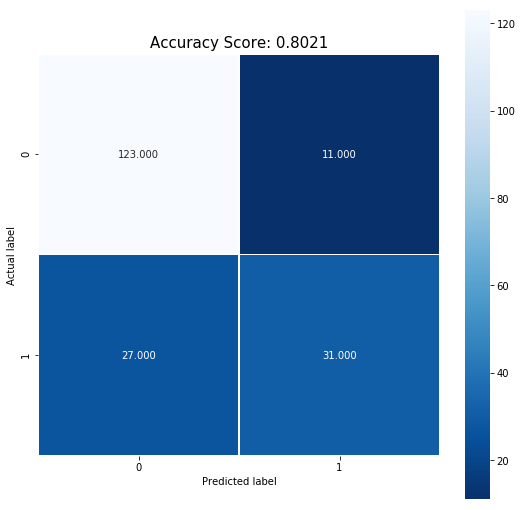

In [201]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(score)
plt.title(all_sample_title, size = 15);
#plt.savefig('confusion matrix - LOGISTIC REGRESSION')

In [202]:
#DECISION TREE

from sklearn.tree import DecisionTreeClassifier

#instancing logicregression class
clf = DecisionTreeClassifier(random_state=70).fit(x_train , y_train)

#score: accuracy of decision tree on test set
score=clf.score(x_test, y_test)
print('accuracy of training set:  {:.4f}'.format(clf.score(x_train, y_train)))
print('accuracy of test set: {:.4f}'.format(score))

accuracy of training set:  1.0000
accuracy of test set: 0.7448


In [203]:
#confusion matrix
predicted=clf.predict(x_test)
cm = metrics.confusion_matrix(y_test, predicted)
print(' [ 0    1 ]  <- predicted o/p \n',cm)

 [ 0    1 ]  <- predicted o/p 
 [[108  26]
 [ 23  35]]


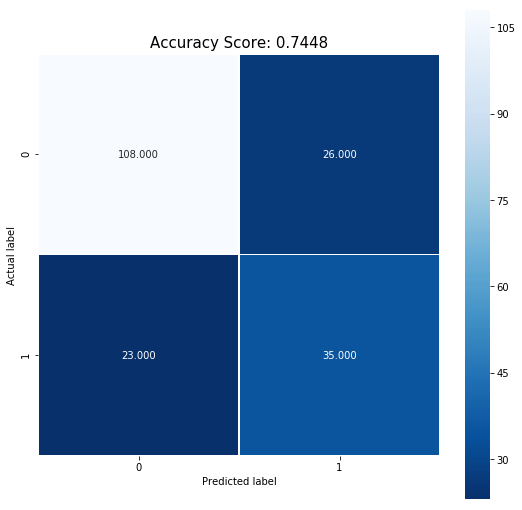

In [204]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(score)
plt.title(all_sample_title, size = 15);
#plt.savefig('confusion matrix - DECISION TREE')

In [205]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

#score: accuracy of random forest on test set
score=rf.score(x_test, y_test)
print("Accuracy on training set: {:.4f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(score))

Accuracy on training set: 1.0000
Accuracy on test set: 0.7552


In [206]:
#confusion matrix
predicted=rf.predict(x_test)
cm = metrics.confusion_matrix(y_test, predicted)
print(' [ 0    1 ]  <- predicted o/p \n',cm)

 [ 0    1 ]  <- predicted o/p 
 [[112  22]
 [ 25  33]]


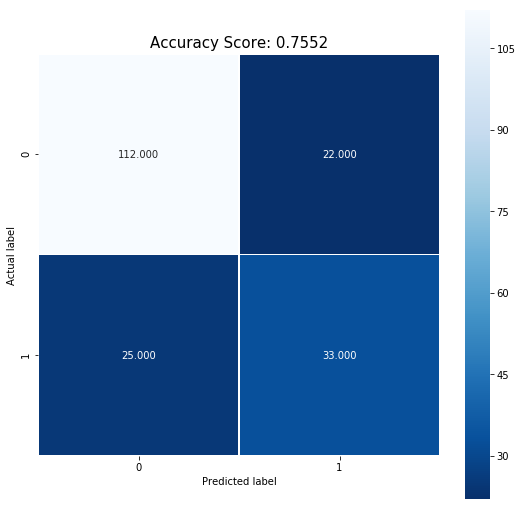

In [207]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(score)
plt.title(all_sample_title, size = 15);
#plt.savefig('confusion matrix - RANDOM FOREST')

In [208]:
#GRADIENT BOOSTING

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=70)
gbc.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(gbc.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbc.score(x_test, y_test)))

Accuracy on training set: 0.9253
Accuracy on test set: 0.7448


In [209]:
"""
the model is most likely overfitting
therefore, lowering the learning rate
"""
print('after lowering the learning rate:\n')
gbc1 = GradientBoostingClassifier(random_state=70, learning_rate=0.01)
gbc1.fit(x_train, y_train)

#score: accuracy of gradient boosting on test set
score=gbc1.score(x_test, y_test)
print("Accuracy on training set: {:.4f}".format(gbc1.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(score))

after lowering the learning rate:

Accuracy on training set: 0.8056
Accuracy on test set: 0.7604


In [210]:
#confusion matrix
predicted=gbc1.predict(x_test)
cm = metrics.confusion_matrix(y_test, predicted)
print(' [ 0    1 ]  <- predicted o/p \n',cm)

 [ 0    1 ]  <- predicted o/p 
 [[120  14]
 [ 32  26]]


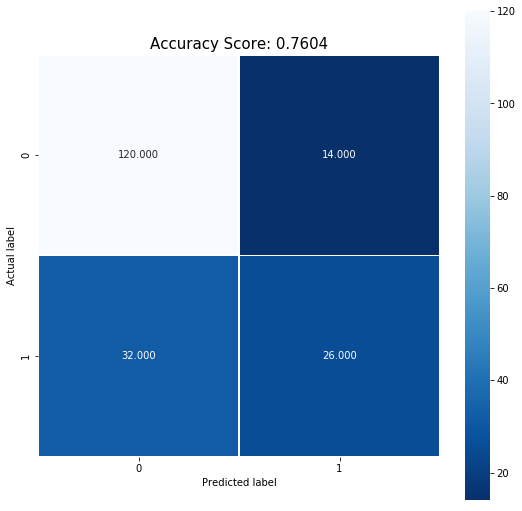

In [211]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(score)
plt.title(all_sample_title, size = 15);
#plt.savefig('confusion matrix - GRADIENT BOOSTING')

In [212]:
#NAIVE BAYES

from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)

#score: accuracy of naive bayes on test set
score=nb.score(x_test, y_test)
print('Accuracy of K-NN classifier on training set: {:.4f}'.format(nb.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'.format(score))

Accuracy of K-NN classifier on training set: 0.7569
Accuracy of K-NN classifier on test set: 0.7812


In [213]:
#confusion matrix
predicted=nb.predict(x_test)
cm = metrics.confusion_matrix(y_test, predicted)
print(' [ 0    1 ]  <- predicted o/p \n',cm)

 [ 0    1 ]  <- predicted o/p 
 [[114  20]
 [ 22  36]]


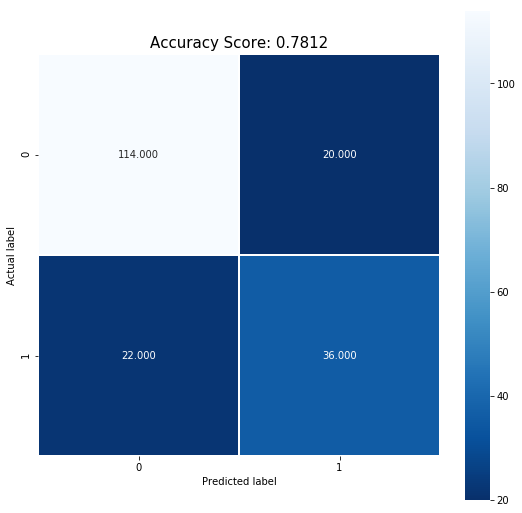

In [214]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(score)
plt.title(all_sample_title, size = 15);
#plt.savefig('confusion matrix - NAIVE BAYES')

In [215]:
#SUPPORT VECTOR MACHINE CLASSIFIER

from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)

#score: accuracy of svm classifier on test set
score=svm.score(x_test, y_test)
print('Accuracy of K-NN classifier on training set: {:.4f}'.format(svm.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'.format(score))

Accuracy of K-NN classifier on training set: 0.7656
Accuracy of K-NN classifier on test set: 0.7917


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [216]:
#confusion matrix
predicted=svm.predict(x_test)
cm = metrics.confusion_matrix(y_test, predicted)
print(' [ 0    1 ]  <- predicted o/p \n',cm)

 [ 0    1 ]  <- predicted o/p 
 [[123  11]
 [ 29  29]]


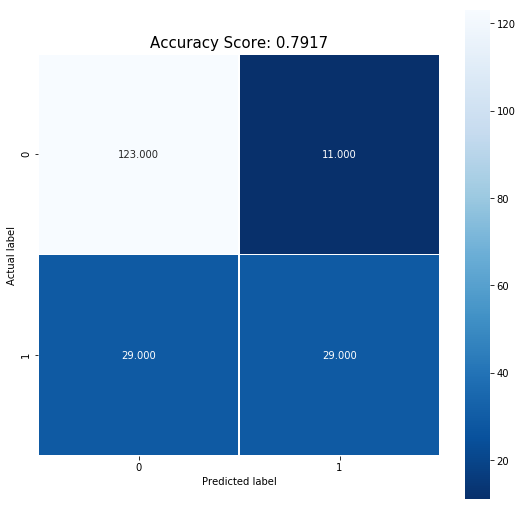

In [217]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(score)
plt.title(all_sample_title, size = 15);
#plt.savefig('confusion matrix - SUPPORT VECTOR MACHINE')